# Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

# Loading the Dataset

In [2]:
df = pd.read_csv("Drivers License Data.csv")
df.head(10)

,Applicant ID,Gender,Age Group,Race,Training,Signals,Yield,Speed Control,Night Drive,Road Signs,Steer Control,Mirror Usage,Confidence,Parking,Theory Test,Reactions,Qualified
0,AID0001,Male,Young Adult,Other,NaN,38.48,30.29,37.03,33.53,39.61,58.16,53.42,35.32,38.19,70.68,Average,No
1,AID0002,Female,Young Adult,Black,NaN,51.76,19.13,63.05,34.87,19.56,16.48,27.97,22.91,24.23,78.18,Average,No
2,AID0003,Male,Middle Age,Black,NaN,30.21,48.13,43.13,42.43,60.93,20.74,28.86,32.32,44.11,79.60,Fast,Yes
3,AID0004,Male,Young Adult,Other,NaN,34.75,47.28,50.49,42.10,22.52,33.87,48.52,24.90,37.56,57.34,Average,No
4,AID0005,Male,Teenager,Other,Advanced,78.52,83.93,59.79,52.68,67.47,89.24,30.31,43.85,55.91,78.44,Average,Yes
5,AID0006,Female,Young Adult,Other,Basic,56.09,59.31,64.18,55.77,60.92,61.85,60.88,60.91,42.64,49.40,Average,Yes
6,AID0007,Male,Middle Age,Black,Basic,62.63,45.75,53.01,31.71,62.35,41.26,44.44,47.03,51.41,78.36,Average,Yes
7,AID0008,Male,Young Adult,Other,Basic,28.47,31.45,58.16,61.68,46.11,50.70,42.56,38.97,31.64,92.37,Average,Yes
8,AID0009,Male,Young Adult,Other,NaN,35.59,41.80,45.71,32.72,10.09,34.31,27.35,36.64,31.94,64.57,Slow,No
9,AID0010,Female,Teenager,White,Advanced,56.62,50.26,35.12,49.42,26.28,57.59,41.20,37.65,50.27,50.17,Average,Yes


# Step 1: Exploratory Data Analysis (EDA)

## 1.1 Dataset Infomation

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Applicant ID   500 non-null    object 
 1   Gender         500 non-null    object 
 2   Age Group      500 non-null    object 
 3   Race           500 non-null    object 
 4   Training       350 non-null    object 
 5   Signals        500 non-null    float64
 6   Yield          500 non-null    float64
 7   Speed Control  500 non-null    float64
 8   Night Drive    500 non-null    float64
 9   Road Signs     500 non-null    float64
 10  Steer Control  500 non-null    float64
 11  Mirror Usage   500 non-null    float64
 12  Confidence     500 non-null    float64
 13  Parking        500 non-null    float64
 14  Theory Test    500 non-null    float64
 15  Reactions      500 non-null    object 
 16  Qualified      500 non-null    object 
dtypes: float64(10), object(7)
memory usage: 66.5+ KB


## 1.2 Dataset Description

In [4]:
df.describe(include='all')

,Applicant ID,Gender,Age Group,Race,Training,Signals,Yield,Speed Control,Night Drive,Road Signs,Steer Control,Mirror Usage,Confidence,Parking,Theory Test,Reactions,Qualified
count,500,500,500,500,350,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500,500
unique,500,2,3,3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,2
top,AID0500,Female,Young Adult,Other,Basic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Average,No
freq,1,256,241,171,198,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,244,251
mean,NaN,NaN,NaN,NaN,NaN,48.525460,47.784000,47.931740,47.877760,47.793440,47.429480,48.157580,47.654440,48.452360,70.623380,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,16.294927,16.062178,15.601242,15.302693,16.042885,15.580004,15.459866,16.056021,15.705702,17.864177,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,0.770000,0.000000,0.000000,1.740000,0.000000,0.000000,0.000000,5.120000,0.000000,40.100000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,38.097500,36.915000,37.297500,37.387500,36.547500,37.340000,38.355000,37.020000,37.460000,54.920000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,48.415000,48.950000,49.405000,48.160000,49.310000,48.220000,48.360000,48.255000,49.400000,69.855000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,59.357500,58.977500,58.392500,58.792500,58.772500,57.515000,58.795000,59.027500,59.262500,86.685000,NaN,NaN


## 1.3 Dropping ID Column

In [5]:
df = df.iloc[:,1:]

## 1.4 Checking for Null Values

In [6]:
df.isnull().sum()

Gender             0
Age Group          0
Race               0
Training         150
Signals            0
Yield              0
Speed Control      0
Night Drive        0
Road Signs         0
Steer Control      0
Mirror Usage       0
Confidence         0
Parking            0
Theory Test        0
Reactions          0
Qualified          0
dtype: int64

In [7]:
df['Training'] = df['Training'].fillna('Intermediate')

# Step 2: Data Preprocessing

## 2.1 Data Encoding

### 2.1.1 Getting Categorical Column Names

In [8]:
categorical_columns = df.select_dtypes(include='object')
categorical_columns

,Gender,Age Group,Race,Training,Reactions,Qualified
0,Male,Young Adult,Other,Intermediate,Average,No
1,Female,Young Adult,Black,Intermediate,Average,No
2,Male,Middle Age,Black,Intermediate,Fast,Yes
3,Male,Young Adult,Other,Intermediate,Average,No
4,Male,Teenager,Other,Advanced,Average,Yes
...,...,...,...,...,...,...
495,Male,Middle Age,Other,Basic,Average,No
496,Male,Young Adult,White,Basic,Average,No
497,Female,Young Adult,Black,Intermediate,Fast,No
498,Male,Middle Age,Black,Basic,Average,No


### 2.1.2 Unique values in all Categorical Columns

In [9]:
def print_unique(categorical_columns):
    for i, col in enumerate(categorical_columns):
        print(f"{col} has: {df[col].unique()}")
        print("*"*20)

print_unique(categorical_columns)

Gender has: ['Male' 'Female']
********************
Age Group has: ['Young Adult' 'Middle Age' 'Teenager']
********************
Race has: ['Other' 'Black' 'White']
********************
Training has: ['Intermediate' 'Advanced' 'Basic']
********************
Reactions has: ['Average' 'Fast' 'Slow']
********************
Qualified has: ['No' 'Yes']
********************


### 2.1.3 Use of Ordinal Encoder

In [10]:
from sklearn.preprocessing import OrdinalEncoder

oe = OrdinalEncoder(categories=[['Male', 'Female']])
df['Gender'] = oe.fit_transform(df[['Gender']])

oe = OrdinalEncoder(categories=[['Teenager', 'Young Adult', 'Middle Age']])
df['Age Group'] = oe.fit_transform(df[['Age Group']])

oe = OrdinalEncoder(categories=[['Black', 'White', 'Other']])
df['Race'] = oe.fit_transform(df[['Race']])

oe = OrdinalEncoder(categories=[['Basic', 'Intermediate', 'Advanced']])
df['Training'] = oe.fit_transform(df[['Training']])

oe = OrdinalEncoder(categories=[['Slow', 'Average', 'Fast']])
df['Reactions'] = oe.fit_transform(df[['Reactions']])

oe = OrdinalEncoder(categories=[['No', 'Yes']])
df['Qualified'] = oe.fit_transform(df[['Qualified']])

## 2.2 Final Dataset after Data Preprocesing

In [11]:
df.head(10)

,Gender,Age Group,Race,Training,Signals,Yield,Speed Control,Night Drive,Road Signs,Steer Control,Mirror Usage,Confidence,Parking,Theory Test,Reactions,Qualified
0,0.0,1.0,2.0,1.0,38.48,30.29,37.03,33.53,39.61,58.16,53.42,35.32,38.19,70.68,1.0,0.0
1,1.0,1.0,0.0,1.0,51.76,19.13,63.05,34.87,19.56,16.48,27.97,22.91,24.23,78.18,1.0,0.0
2,0.0,2.0,0.0,1.0,30.21,48.13,43.13,42.43,60.93,20.74,28.86,32.32,44.11,79.60,2.0,1.0
3,0.0,1.0,2.0,1.0,34.75,47.28,50.49,42.10,22.52,33.87,48.52,24.90,37.56,57.34,1.0,0.0
4,0.0,0.0,2.0,2.0,78.52,83.93,59.79,52.68,67.47,89.24,30.31,43.85,55.91,78.44,1.0,1.0
5,1.0,1.0,2.0,0.0,56.09,59.31,64.18,55.77,60.92,61.85,60.88,60.91,42.64,49.40,1.0,1.0
6,0.0,2.0,0.0,0.0,62.63,45.75,53.01,31.71,62.35,41.26,44.44,47.03,51.41,78.36,1.0,1.0
7,0.0,1.0,2.0,0.0,28.47,31.45,58.16,61.68,46.11,50.70,42.56,38.97,31.64,92.37,1.0,1.0
8,0.0,1.0,2.0,1.0,35.59,41.80,45.71,32.72,10.09,34.31,27.35,36.64,31.94,64.57,0.0,0.0
9,1.0,0.0,1.0,2.0,56.62,50.26,35.12,49.42,26.28,57.59,41.20,37.65,50.27,50.17,1.0,1.0


# Step 3: Data Visualization

## 3.1 All Feature Distribution Plot based on pre-labelled data

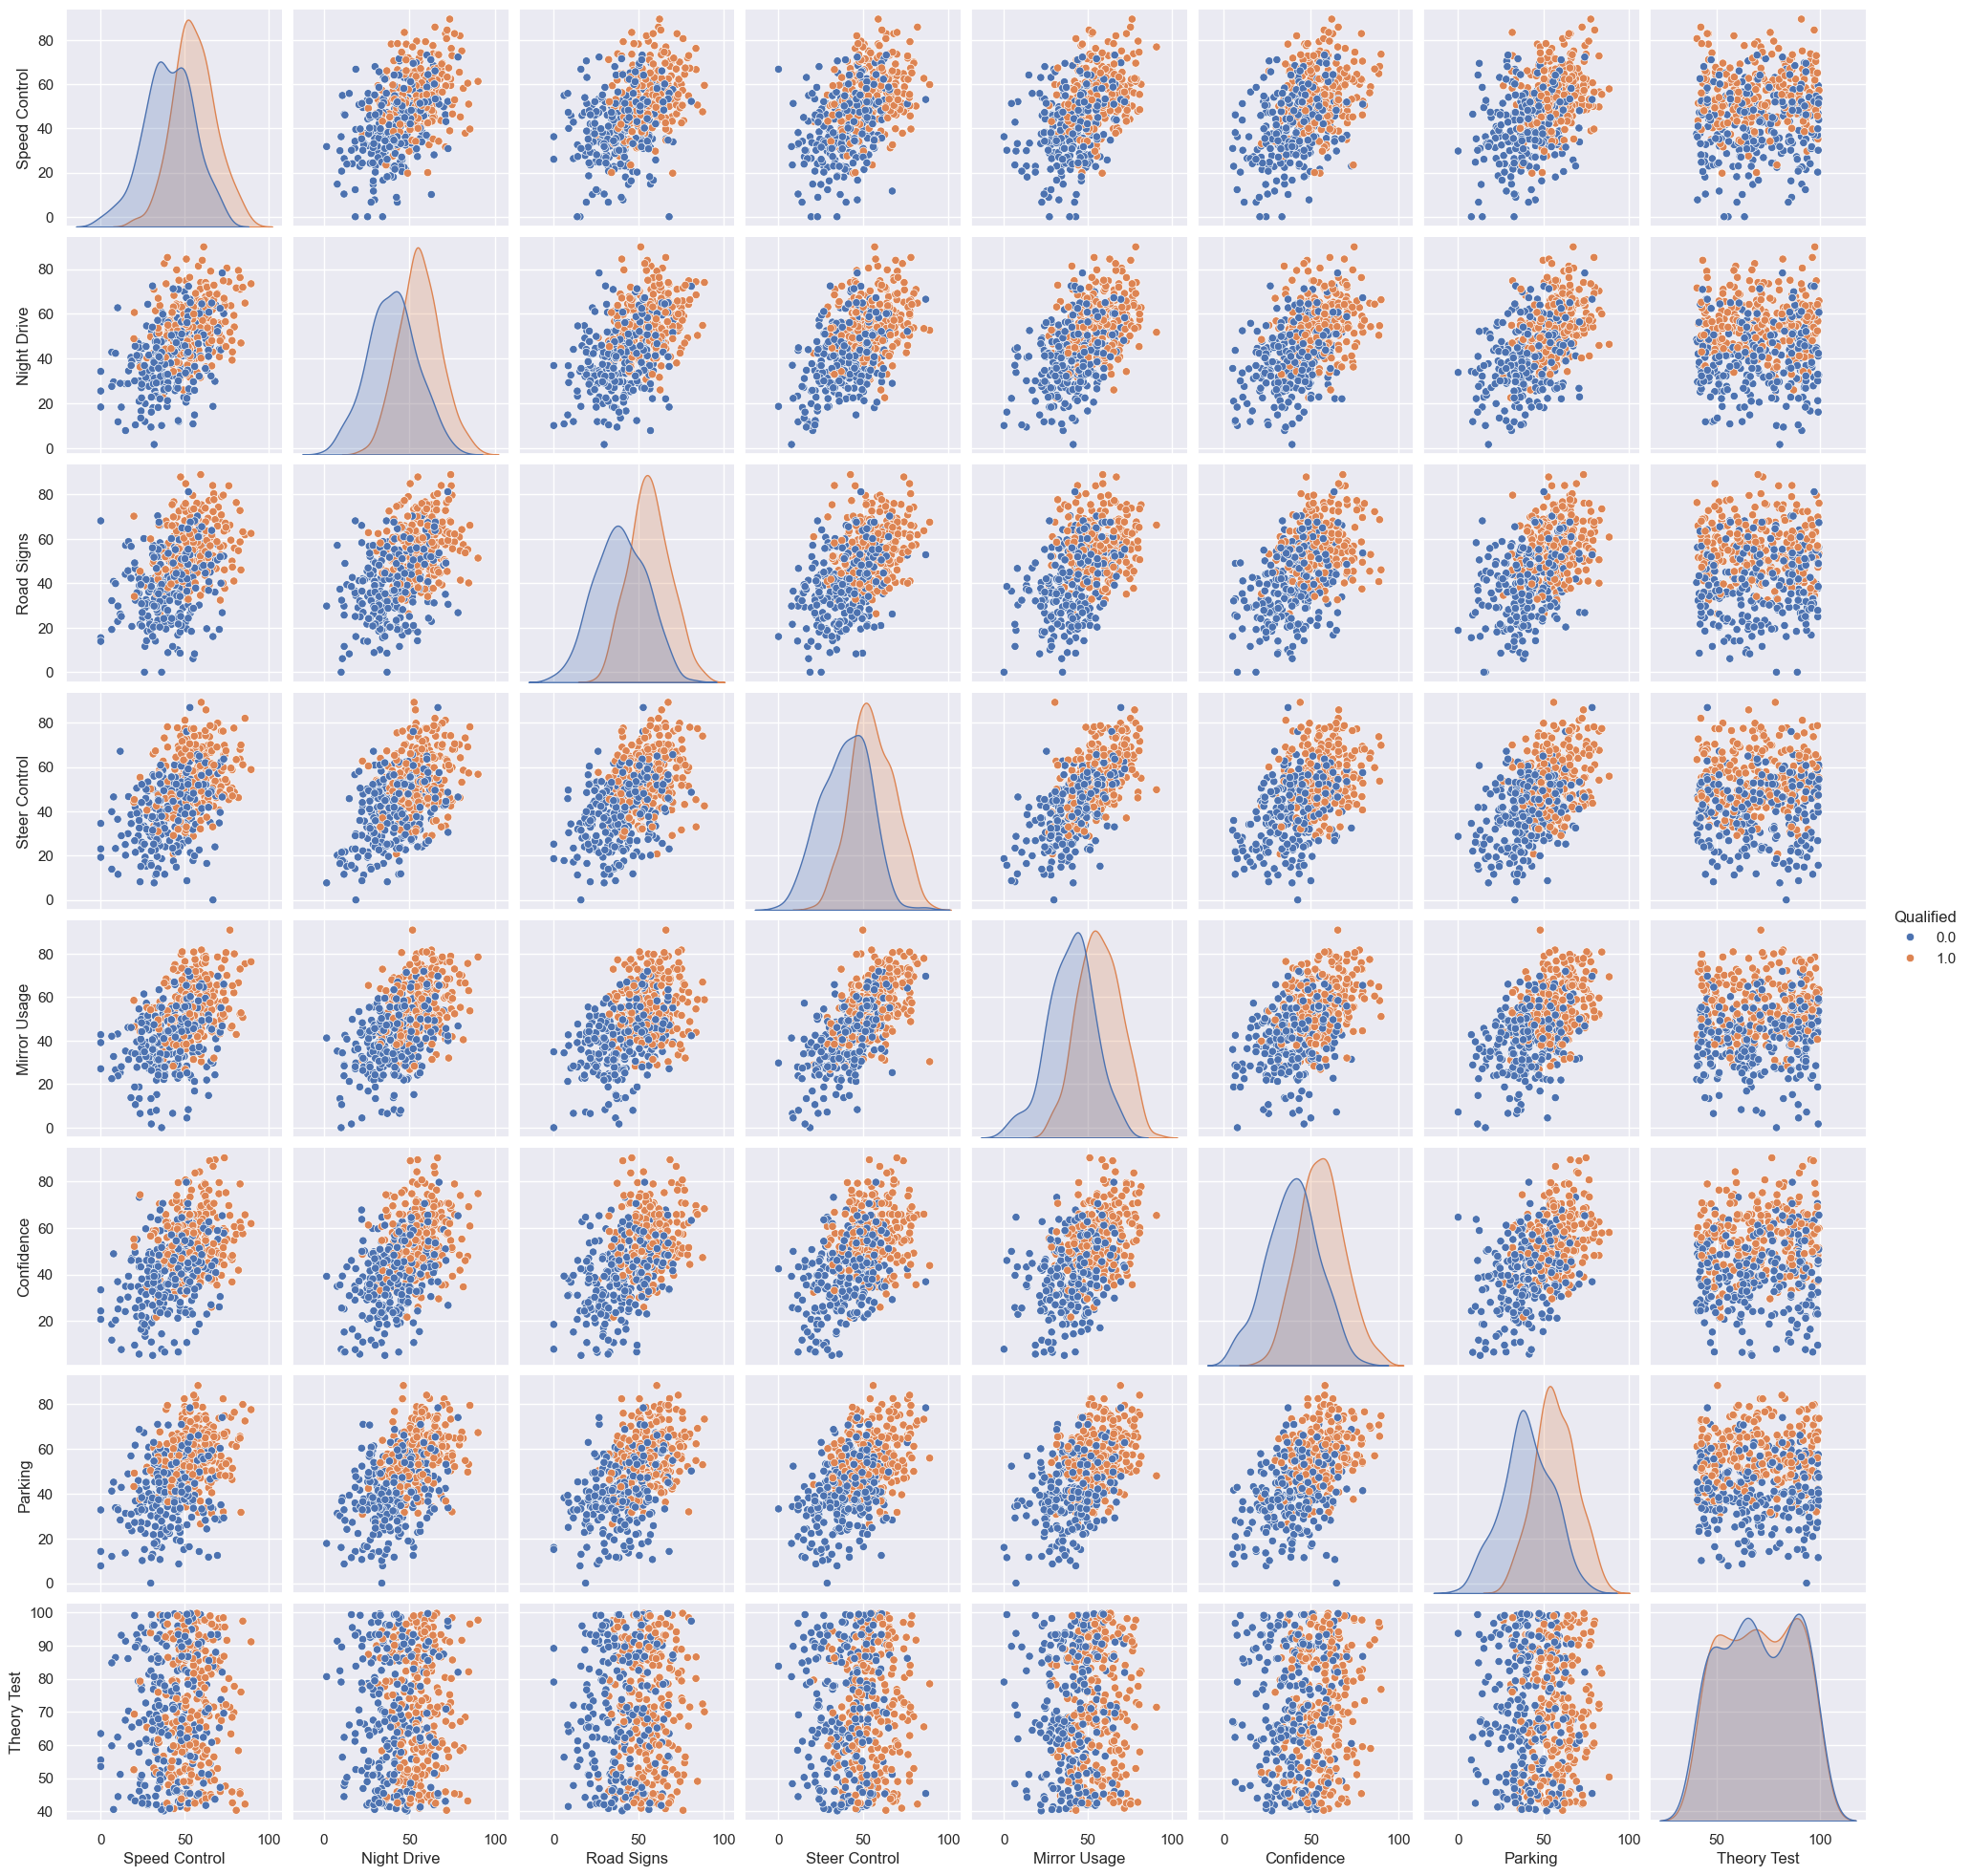

In [17]:
sns.pairplot(df.iloc[:,6:].drop(columns='Reactions'), hue='Qualified')

## 3.2 Correlation Heatmap between all features vs target variable

<Axes: >

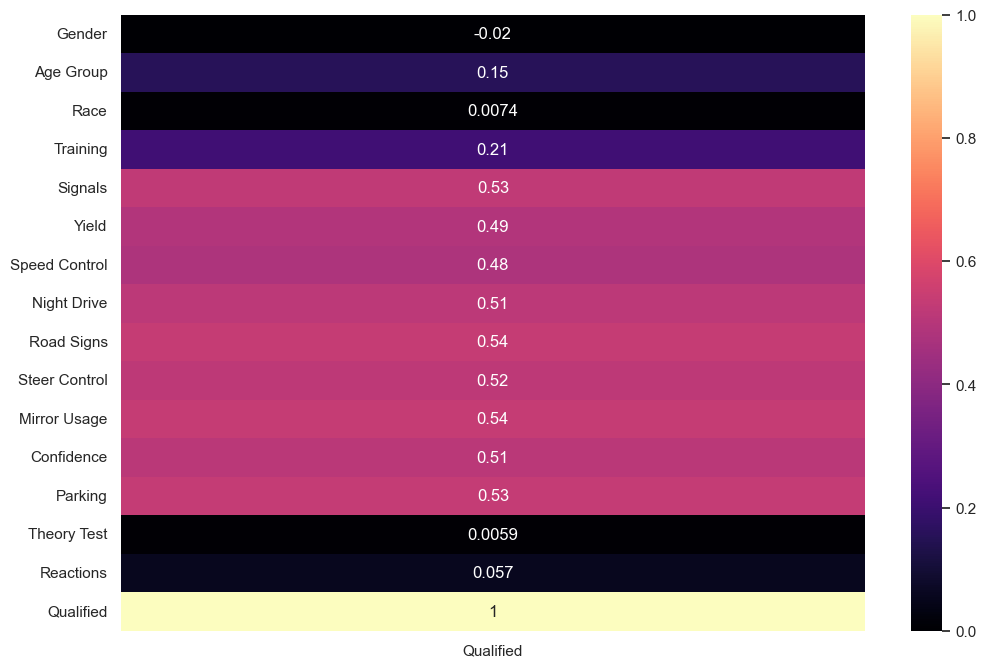

In [12]:
corr_df = pd.DataFrame(data = df.corr())
plt.figure(figsize = (12, 8))
sns.heatmap(corr_df.iloc[:,-1:], annot=True, cmap='magma', vmax=1, vmin=0)

# Step 4: Model Building 

## 4.1 Getting Features for prediction

In [14]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, precision_score, classification_report

In [15]:
X = df.iloc[:,:-1]

## 4.2 Feature Scaling

In [17]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[-1.02429504, -0.09772305,  1.20476695, ..., -0.65407058,
         0.00317265, -0.14690438],
       [ 0.97628121, -0.09772305, -1.2389794 , ..., -1.54380992,
         0.42342772, -0.14690438],
       [-1.02429504,  1.29832058, -1.2389794 , ..., -0.27675992,
         0.50299602,  1.26563772],
       ...,
       [ 0.97628121, -0.09772305, -1.2389794 , ..., -0.70951995,
         0.86721709,  1.26563772],
       [-1.02429504,  1.29832058, -1.2389794 , ..., -0.75987053,
         0.832476  , -0.14690438],
       [ 0.97628121, -0.09772305, -1.2389794 , ...,  0.35039159,
         0.36122997, -0.14690438]])

## 4.3 Model Creation

### 4.3.1 Elbow method for KMeans Clsutering

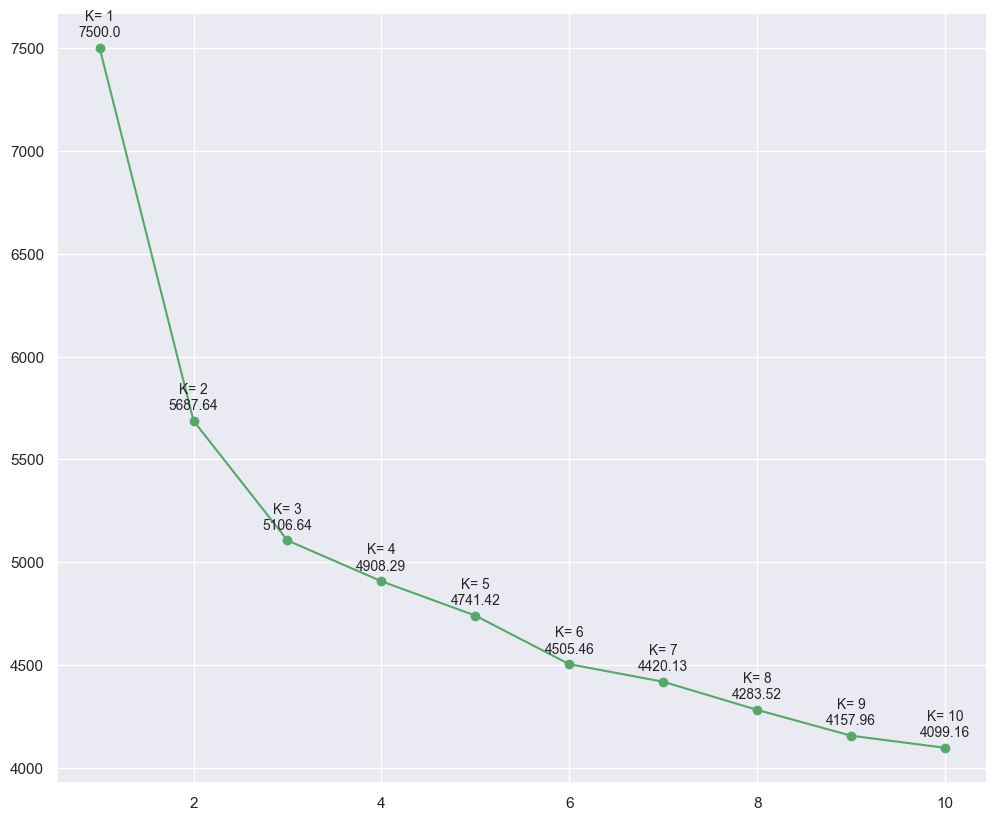

In [18]:
wcss = []
k = range(1, 11)
for i in k:
    kmeans = KMeans(n_clusters=i, random_state=25)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize = (12, 10))
plt.plot(k, wcss, 'go-')
for i, val in enumerate(wcss):
    plt.annotate(f"K= {i+1}\n{round(val, 2)}", (k[i], wcss[i]), textcoords='offset points', xytext = (0, 8), ha='center', fontsize=10)

### 4.3.2 Predicting the labels (Using KMeans)

In [19]:
kmeans = KMeans(n_clusters=2, random_state=25)
pred_kmeans = kmeans.fit_predict(X_scaled)

### 4.3.3 Checking Feature Importance

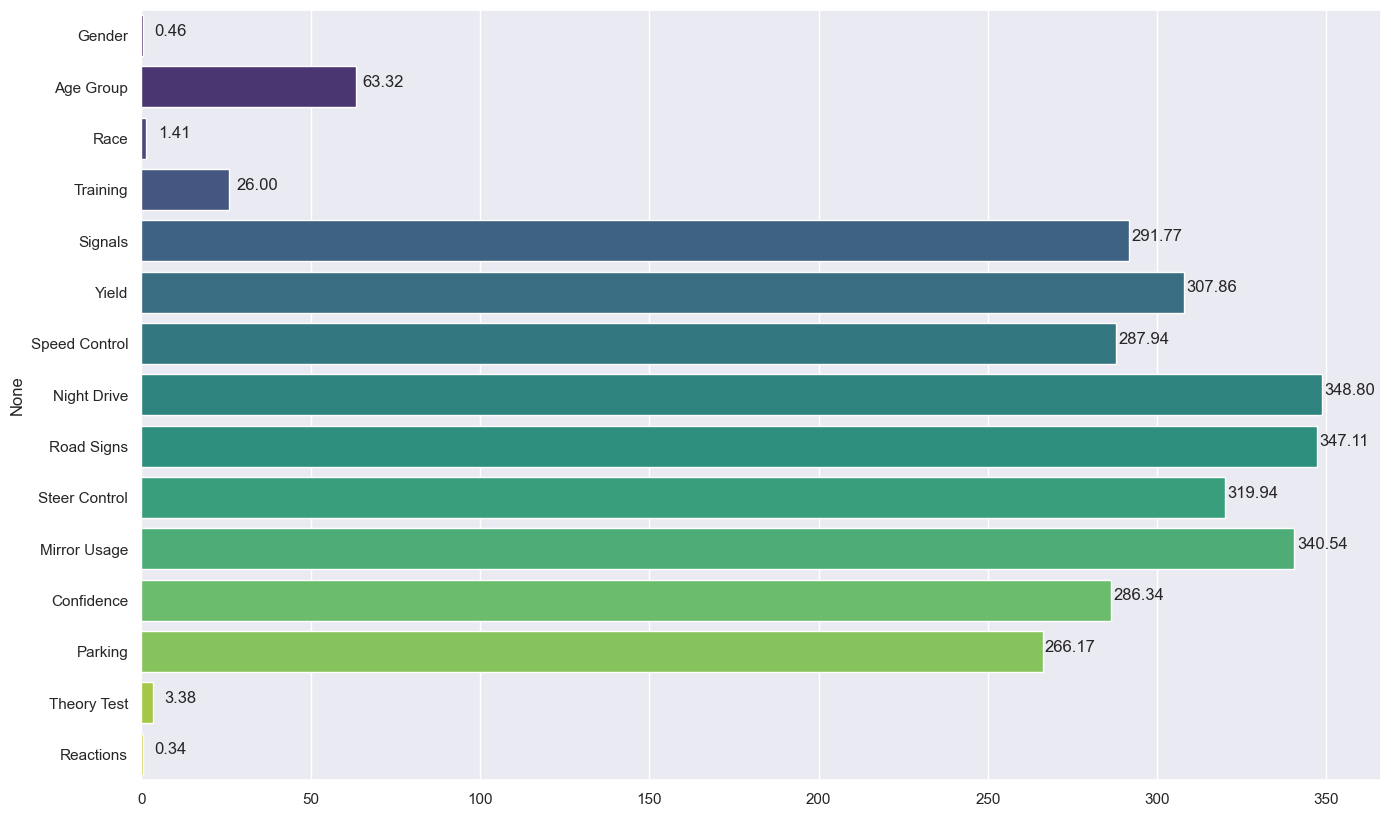

In [20]:
from sklearn.feature_selection import f_classif
F_Value, P_Value = f_classif(X, pred_kmeans)
plt.figure(figsize = (16,10))
sns.barplot(y=X.columns, x=F_Value, hue=X.columns, palette="viridis")

for i, f in enumerate(F_Value):
    plt.annotate(text=f"{f:.2f}", xy=(f, i), xytext=(20, 0), textcoords="offset points", ha='center')

# Step 5: Predicting on new Data